In [1]:
! pip install -U backtrader

Requirement already up-to-date: backtrader in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (1.9.74.123)


In [ ]:
# Strategy
from datetime import datetime
import backtrader

# Integrate Model
import sys
import warnings
import numpy
import pandas
warnings.filterwarnings('ignore')

In [ ]:
# Build Instance and draw single plot
#為了將GUI圖形顯示在 Jupyter notebook 
%matplotlib inline
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot

In [3]:
# 寫出我們的客製化交易策略(讓程式依照這個邏輯進行交易)
def Function_For_Build_Customize_Object(Parameter1, Parameter2):
    
    class Customize_Object(backtrader.Strategy):
        def __init__(self):
    
            self.data_open = self.datas[0].open
            self.data_high = self.datas[0].high
            self.data_low = self.datas[0].low
            self.data_close = self.datas[0].close
            self.data_volume = self.datas[0].volume
               
        def next(self):
            

################################################################################################
#                                      Space for Customize Strategy 
#                                           我們把策略寫在這裡
#                                      Space for Customize Strategy   
################################################################################################           

#                                        這裡是我們寫交易邏輯策略的地方



            
#################################################################################################            
##                                      Space for Customize Strategy   1 
#################################################################################################           
#            當該時間區間之收盤大於開盤 (EX: 今日收盤大於今日開盤)
#            if self.data_close[0] > self.data_open[0]:
#                self.buy()
#            當該時間區間之收盤小於開盤 (EX: 今日收盤低於今日開盤)
#            if self.data_close[0] < self.data_open[0]:
#                self.sell()
#
#################################################################################################            
##                                      Space for Customize Strategy   1
#################################################################################################





#################################################################################################            
##                                      Space for Customize Strategy   2
#################################################################################################             
#
#            當時間區間之開盤價大於前時間區間收盤價就買 (EX: 今日開盤大於昨日收盤)
#            if self.data_open[0] > self.data_close[-1] :
#                self.buy()
#                print("Buying")                                
#
#            當時間區間之開盤價小於前時間區間收盤價就賣 (EX: 今日開盤低於昨日收盤)
#            if self.data_open[0] < self.data_close[-1] :
#                self.sell()
#                print("Selling")
#
#################################################################################################            
##                                      Space for Customize Strategy   2
################################################################################################# 




#################################################################################################            
##                                      Space for Customize Strategy   3
#################################################################################################             
#
#            當時間區間之開盤價大於前時間區間最高價就買 (EX: 今日開盤大於昨日最高)
#            if self.data_open[0] > self.data_high[-1] : 
#                self.buy()
#                print("Buying")                                
#
#            當時間區間之開盤價小於前時間區間最低價就賣 (EX: 今日開盤低於昨日最低)
#            if self.data_open[0] < self.data_low[-1] :
#                self.sell()
#                print("Selling")
#
#################################################################################################            
##                                      Space for Customize Strategy   3
################################################################################################# 

                
#                                   這裡是我們寫交易邏輯策略的地方

                
################################################################################################
#                                      Space for Customize Strategy 
#                                           我們把策略寫在這裡
#                                      Space for Customize Strategy   
################################################################################################            


            print(pandas.DataFrame({"Open Price": self.data_open[0],
                                    "High Price": self.data_high[0],
                                    "Low Price": self.data_low[0],
                                    "Close Price": self.data_close[0],
                                    "Volumns": self.data_volume[0]},index=[0]))    


    return Customize_Object
            
    

In [ ]:
import yfinance
class PandasData(backtrader.feed.DataBase):
    '''
    The ``dataname`` parameter inherited from ``feed.DataBase`` is the pandas
    DataFrame
    '''

    params = (
        # Possible values for datetime (must always be present)
        #  None : datetime is the "index" in the Pandas Dataframe
        #  -1 : autodetect position or case-wise equal name
        #  >= 0 : numeric index to the colum in the pandas dataframe
        #  string : column name (as index) in the pandas dataframe
        ('datetime', None),

        # Possible values below:
        #  None : column not present
        #  -1 : autodetect position or case-wise equal name
        #  >= 0 : numeric index to the colum in the pandas dataframe
        #  string : column name (as index) in the pandas dataframe
        ('open', -1),
        ('high', -1),
        ('low', -1),
        ('close', -1),
        ('volume', -1)
    )

In [ ]:
-

In [4]:
# Integrate Model
from datetime import datetime
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot
import warnings
warnings.filterwarnings('ignore')
# Build Instance and draw single plot
#為了將GUI圖形顯示在 Jupyter notebook 
%matplotlib inline

class Trading_Picture_Generator:


    # General
    Trading_Object_Name = ""
    Trading_Level_Multiplier = 1000
    
    Trading_DateTime_Interval = ""
    Trading_DateTime_Start = ""
    Trading_DateTime_End = ""
    
    I_Am_Trading_Cerebro_Object = backtrader.Cerebro()


    def __init__(
        self, 
        Trading_Object_Name_Input, 
        Trading_Level_Multiplier_Input, 
        Trading_DateTime_Interval,
        Trading_DateTime_Start_Input, 
        Trading_DateTime_End_Input):

        self.Trading_Object_Name = Trading_Object_Name_Input
        self.Trading_Level_Multiplier = Trading_Level_Multiplier_Input

        self.Trading_DateTime_Interval = Trading_DateTime_Interval
        self.Trading_DateTime_Start = Trading_DateTime_Start_Input
        self.Trading_DateTime_End = Trading_DateTime_End_Input


    def Function_RunTrading_Customize(self, parameter): 

        Cerebro_Object = backtrader.Cerebro()
        Cerebro_Object.broker.setcommission(mult=self.Trading_Level_Multiplier)
        Customize_StrategyObject = Function_For_Build_Customize_Object(parameter)
        Cerebro_Object.addstrategy(Customize_StrategyObject)

        Im_Data = backtrader.feeds.YahooFinanceData(
            dataname = self.Trading_Object_Name, 
            fromdate=self.Trading_DateTime_Start, 
            todate=self.Trading_DateTime_End)    

        Im_RawData = yfinance.download( tickers = self.Trading_Object_Name,  
                                 interval = self.Trading_DateTime_Interval,
                                 start=self.Trading_DateTime_Start, 
                                 end=self.Trading_DateTime_End)
        Im_Data = backtrader.feeds.PandasData(dataname=Im_RawData)                 
        
        Cerebro_Object.adddata(Im_Data)
        Cerebro_Object.broker.setcash(10000.0)
        Cerebro_Object.run()
        
        self.Trading_Cerebro_Object = Cerebro_Object


    def Function_Plotting_Customize(self) : 

    #    cerebro.plot()
        figure = matplotlib.pyplot.figure(figsize=(24.0, 15.0))
        figure = self.Trading_Cerebro_Object.plot()[0][0]
        figure.savefig('Trading_Plot/Customize/TradingCustomizeStratey_Object[{}]_Position[{}%]_Multiplier[{}].jpg'.format(
            self.Trading_Object_Name,
            self.Trading_Cerebro_Object.broker.getvalue()/100,
            self.Trading_Level_Multiplier))
        matplotlib.pyplot.close(figure)
        matplotlib.pyplot.close("all")


   Open Price  High Price  Low Price  Close Price       Volumns
0     2683.73     2695.89    2682.36      2695.81  3.367250e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2697.85     2714.37    2697.77      2713.06  3.538660e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2719.31     2729.29    2719.07      2723.99  3.695260e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2731.33     2743.45    2727.92      2743.15  3.236620e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2742.67     2748.51     2737.6      2747.71  3.242650e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2751.15     2759.14    2747.86      2751.29  3.453480e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2745.55      2750.8    2736.06      2748.23  3.576350e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2752.97     2767.56    2752.78    

   Open Price  High Price  Low Price  Close Price       Volumns
0     2748.46     2752.61    2739.51       2748.8  3.517790e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2753.25     2772.39    2748.46      2772.35  3.651640e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2774.84      2779.9    2760.16      2770.37  3.711330e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2765.84     2779.39    2763.59      2779.03  3.123210e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2780.18     2790.21    2780.17       2782.0  3.232330e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0      2785.6      2789.8    2778.78      2786.85  3.401010e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2787.94     2791.47    2774.65      2775.63  3.779230e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2783.21     2789.06    2776.52    

   Open Price  High Price  Low Price  Close Price       Volumns
0      2738.4     2756.82    2737.08      2755.45  3.510860e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2774.13     2815.15    2774.13      2813.89  3.914750e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2806.38     2814.75    2794.99      2806.83  3.630490e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0      2794.1      2794.1    2764.24      2781.01  4.019090e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2773.93     2775.99     2722.0      2726.22  3.670930e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2730.05      2754.6    2714.98      2722.18  4.091440e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0      2737.9      2746.8    2685.75      2701.58  4.402370e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2693.52     2735.38    2670.75    

   Open Price  High Price  Low Price  Close Price       Volumns
0     2873.99     2881.28    2867.14      2879.39  3.015180e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2884.16     2893.24    2882.99      2892.74  3.146820e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2888.46     2895.95    2880.78      2895.77  3.054030e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2886.58     2886.88    2873.33       2878.2  3.007980e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2881.37     2889.71    2879.13      2888.21  3.062380e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2891.92     2893.42    2881.99      2888.32  2.938540e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2900.86     2910.54    2898.37      2907.41  3.688490e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2908.32      2909.6    2896.48    

   Open Price  High Price  Low Price  Close Price       Volumns
0     2937.09     2940.43    2913.32      2926.46  3.008450e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2909.01     2914.39    2891.85      2906.27  3.426790e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2924.67     2938.84    2921.86      2937.78  3.163260e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0      2960.6     2985.86     2960.6       2976.0  3.890700e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2980.33     2985.03    2972.51      2978.71  3.208280e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2988.43     2989.43    2969.39      2978.43  4.002890e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2971.01     2979.39    2957.01      2979.39  4.390770e+09
   Open Price  High Price  Low Price  Close Price       Volumns
0     2981.41     3000.93    2975.31    

<Figure size 1728x1080 with 0 Axes>

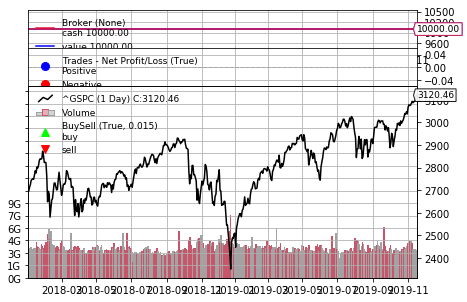

In [5]:
# Customize Strategy 

I_Am_Trading_Instance = Trading_Picture_Generator("^GSPC", 1000, "1d",datetime(2020,1,1), datetime(2020,3,3))
I_Am_Trading_Instance.Function_RunTrading_Customize("No_using")
I_Am_Trading_Instance.Function_Plotting_Customize()